Let us go back to our original Gaussian pulse: $$E_y=Re(E_0e^{i\omega_0t}\times e^{-\Gamma t^2})=Re(E_0e^{i\omega_0t-\Gamma t^2})$$ We want to generate a plot of this pulse in python.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import math

plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def pulse(t,e0,omega,g):
    return e0*np.e**(-g*(t**2))*np.cos(omega*t)

t = np.linspace(-3, 3, 1000)

Now let us plot the pulse for some arbitrary values for $\Gamma$ and $E_0$ as well as an arbitrary constant value for the frequency $\omega$. 

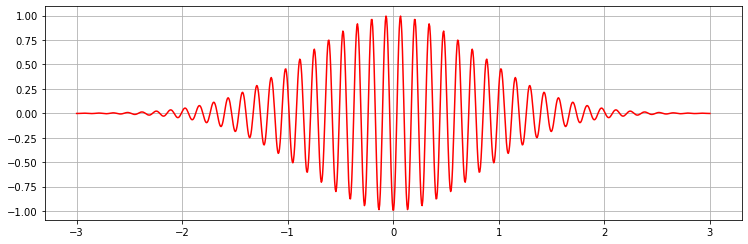

Half maxima at t= -0.8918918918918921 and t= 0.8918918918918917 so dt=1.7837837837837838


In [2]:
plt.plot(t, pulse(t,1,10**3,0.75),color='red')

p=pulse(t,1,10**3,0.75)

s=list()

for i in range(len(t)):
    if math.isclose(p[i],0.5,abs_tol=0.03) and p[i]>=0.5:
        s.append(t[i])

plt.grid()

plt.show()

print(f"Half maxima at t= {s[0]} and t= {s[1]} so dt={s[1]-s[0]}")

Now let us plot the frequencies in the pulse. We know from before that for this pulse the result should be the field:$$E(\omega)=e^\frac{-(\omega-\omega_0)^2}{4\Gamma}$$

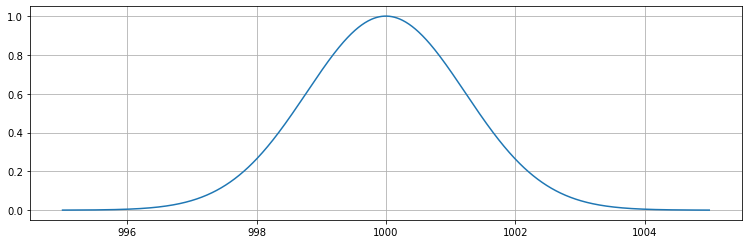

Half maxima at omega= 998.5635635635635 and omega= 1001.4364364364365 so domega=2.872872872872904


In [3]:
omega=np.linspace(995,1005,1000)

plt.plot(omega,np.e**(-(omega-10**3)**2/(4*0.75)))

s2=list()

spec=np.e**(-(omega-10**3)**2/(4*0.75))

for i in range(len(omega)):
    if math.isclose(spec[i],0.5,abs_tol=0.003) and spec[i]>=0.5:
        s2.append(omega[i])

plt.grid()

plt.show()

print(f"Half maxima at omega= {s2[0]} and omega= {s2[1]} so domega={s2[1]-s2[0]}")

We can also perform the Fourier transform numerically:

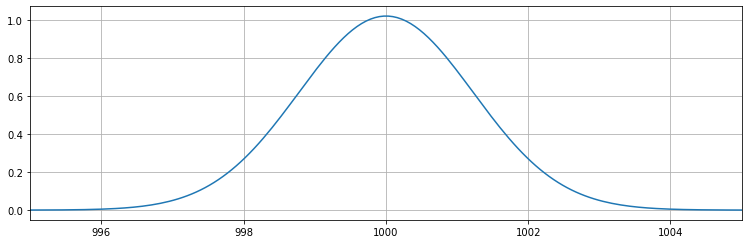

Half maxima at omega= 998.5886380473277 and omega= 1001.4160770904366 so domega=2.8274390431089387


In [4]:
N = 10**6
T = 10**-4
x = np.linspace(-N*T/2, N*T/2, 2*N)
y_f = np.fft.fft(pulse(x,1,10**3,0.75))
x_f = 2*np.pi*np.linspace(0, 1/(2*T), N//2)

plt.xlim(995,1005)

plt.plot(x_f, 50/N * np.abs(y_f[:N//2]))

s3=list()

spec2=50/N * np.abs(y_f[:N//2])

for i in range(len(x_f)):
    if math.isclose(spec2[i],0.5,abs_tol=0.03) and spec2[i]>=0.5:
        s3.append(x_f[i])

plt.grid()

plt.show()

print(f"Half maxima at omega= {s3[0]} and omega= {s3[1]} so domega={s3[1]-s3[0]}")

Now let us modify the phase of the pulse into a quadratic one, i.e. $\Phi(t)=\omega_0t+\alpha t^2$ which gives an instantaneous frequency of $\omega(t)=\omega_0+2\alpha t$ and look at the time plot of the pulse(top) and phase(bottom) for an arbitrary value of $\alpha$:

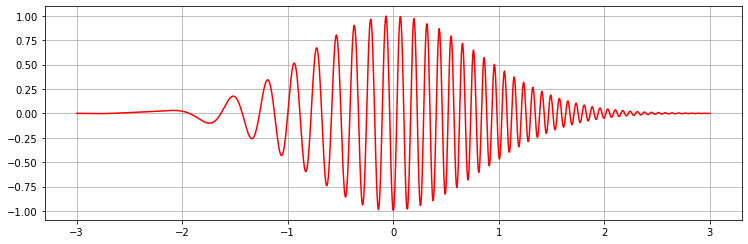

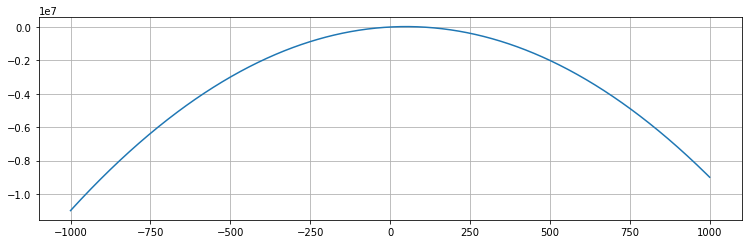

In [5]:
t = np.linspace(-3, 3, 1000)

plt.plot(t,pulse(t,1,10**3-10*t,0.75),color="red")

plt.grid()

plt.show()

t = np.linspace(-10**3, 10**3, 1000)
plt.plot(t,10**3*t-10*t**2)

plt.grid()

plt.show()

As expected the pulse is now linearly chirped and looking at the spectral content of the pulse gives: 

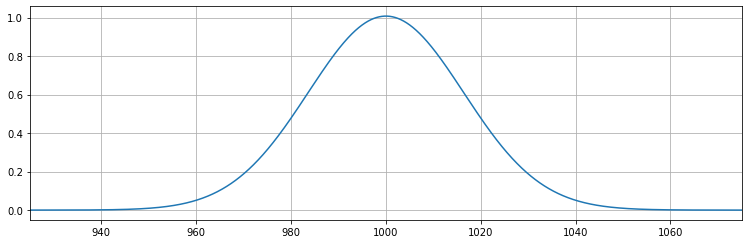

Half maxima at omega= 980.6186921289022 and omega= 1019.386023008862 so domega=38.767330879959786


In [6]:
N = 10**6
T = 10**-4
x = np.linspace(-N*T/2, N*T/2, N)
y = pulse(x,1,10**3-10*x,0.75)
y_f = np.fft.fft(y)
x_f = 2*np.pi*np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.xlim(925,1075)

spec3=360/N * np.abs(y_f[:N//2])

plt.plot(x_f, 360/N * np.abs(y_f[:N//2]))

s4=list()

for i in range(len(x_f)):
    if math.isclose(spec3[i],0.5,abs_tol=0.0003) and spec3[i]>=0.5:
        s4.append(x_f[i])

plt.grid()

plt.show()

print(f"Half maxima at omega= {s4[0]} and omega= {s4[1]} so domega={s4[1]-s4[0]}")

As can be seen, the spectral bandwidth has increased by a considerable amount.Let us now look at what happens at higher orders with the coefficients being chosen randomly:

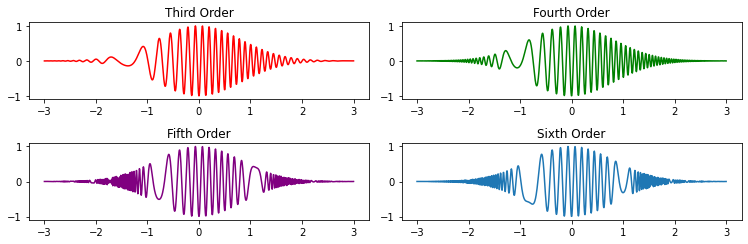

In [7]:
t = np.linspace(-3, 3, 1000)

Y1 = pulse(t,1,10**3-10*t+3*t**2,0.75)
Y2 = pulse(t,1,10**3-10*t+3*t**2-3*t**3,0.75)
Y3 = pulse(t,1,10**3-10*t+3*t**2-3*t**3+10*t**4,0.75)
Y4 = pulse(t,1,10**3-10*t+3*t**2-3*t**3+10*t**4+3*t**5,0.75)
  
figure, axis = plt.subplots(2, 2)
  
axis[0, 0].plot(t, Y1,color="red")
axis[0, 0].set_title("Third Order")
  

axis[0, 1].plot(t, Y2,color="green")
axis[0, 1].set_title("Fourth Order")
  

axis[1, 0].plot(t, Y3,color="purple")
axis[1, 0].set_title("Fifth Order")

  
axis[1, 1].plot(t, Y4)
axis[1, 1].set_title("Sixth Order")
  
plt.rcParams["figure.figsize"] = [16.50, 5.50]
plt.rcParams["figure.autolayout"] = True

plt.show()

As nice as these plots look, they don't reveal much about the effect of the phase being changed. The phase for each plot is given below: 

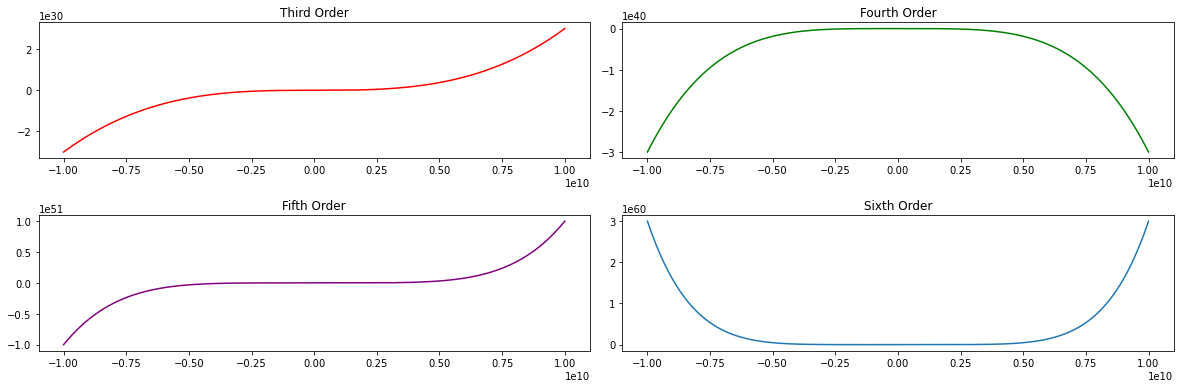

In [8]:
t = np.linspace(-10**10, 10**10, 10000)

Y1 = 10**3*t-10*t**2+3*t**3
Y2 = 10**3*t-10*t**2+3*t**3-3*t**4
Y3 = 10**3*t-10*t**2+3*t**3-3*t**4+10*t**5
Y4 = 10**3*t-10*t**2+3*t**3-3*t**4+10*t**5+3*t**6
  
figure, axis = plt.subplots(2, 2)
  
axis[0, 0].plot(t, Y1,color="red")
axis[0, 0].set_title("Third Order")
  

axis[0, 1].plot(t, Y2,color="green")
axis[0, 1].set_title("Fourth Order")
  

axis[1, 0].plot(t, Y3,color="purple")
axis[1, 0].set_title("Fifth Order")

  
axis[1, 1].plot(t, Y4)
axis[1, 1].set_title("Sixth Order")
  
plt.rcParams["figure.figsize"] = [16.50, 5.50]
plt.rcParams["figure.autolayout"] = True

plt.show()

As expected the plots at even orders give an even function while the odd orders give an odd function, that is for even orders the phase decreases/increases near the centre and for odd orders the phase keeps increasing/decreasing with time depending on the sign of the coefficients. The superposition of all of these signals gives:

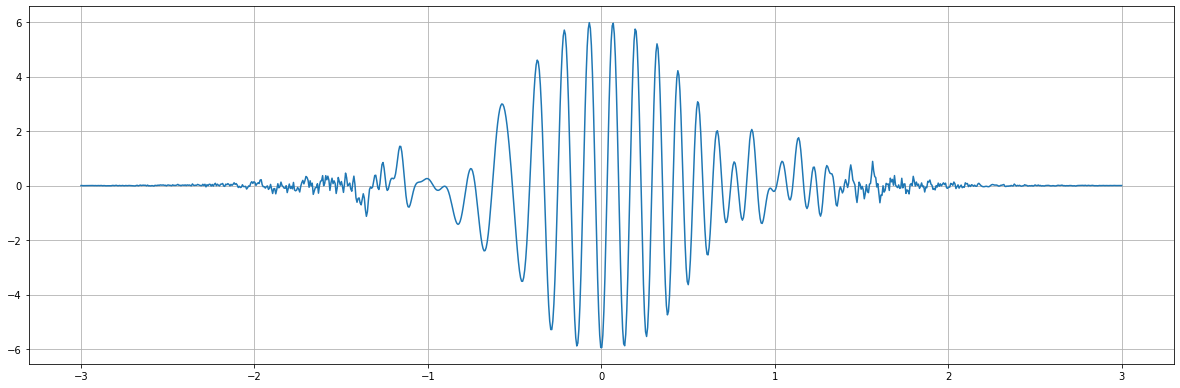

In [9]:
t = np.linspace(-3, 3, 1000)

Y1 = pulse(t,1,10**3,0.75)
Y2 = pulse(t,1,10**3-10*t,0.75)
Y3 = pulse(t,1,10**3-10*t+3*t**2,0.75)
Y4 = pulse(t,1,10**3-10*t+3*t**2-3*t**3,0.75)
Y5 = pulse(t,1,10**3-10*t+3*t**2-3*t**3+10*t**4,0.75)
Y6 = pulse(t,1,10**3-10*t+3*t**2-3*t**3+10*t**4+3*t**5,0.75)
sup = Y1+Y2+Y3+Y4+Y5+Y6

plt.plot(t,sup)

plt.grid()

plt.show()

As all the signals are about the same near the centre, the signal resembles the original one at the first order near the centre and far from the centre the resultant signal looks like it has ambient noise. Now that we have seen the temporal profiles for pulses with phases at different orders let us create a general function that takes the temporal evoluation of a pulse and plots it along with its spectral profile as well as finding the full width at half maximum for both of these graphs:

In [10]:
def pulse2(t1,e0,omega,g):
    return (t1,e0*np.e**(-g*(t1**2))*np.cos(omega*t1))

def Temporal(p,tol=0.03):

    t1,pul=p
    
    plt.plot(t1,pul,color='red')
    
    st=list()
    
    hm=max(abs(pul))/2
    
    for i in range(len(t1)):
        if math.isclose(abs(pul[i]),hm,abs_tol=tol) and abs(pul[i])>=abs(hm):
            st.append(t1[i])

    plt.grid()

    plt.show()

    print(f"Half maxima at t= {st[0]} and t= {st[-1]} so dt={st[-1]-st[0]}")
    
def Spectral(p,a=100,start=950,end=1050,tol=0.03):
    
    t1,pul=p
    N=len(t1)
    T=t1[-1]/N*2
    
    
    y_f = np.fft.fft(pul)
    x_f = 2*np.pi*np.linspace(0, 1/(2*T), N//2)
    y=a/N*np.abs(y_f[:N//2])

    plt.xlim(start,end)
    
    x_f,y=x_f[100:],y[100:]
      
    plt.plot(x_f,y)
    
    hm=max(y)/2

    sw=list()
    
    for i in range(len(x_f)):
        if math.isclose(y[i],hm,abs_tol=tol) and y[i]>=hm:
            sw.append(x_f[i])
    
    plt.grid()

    plt.show()

    print(f"Half maxima at omega= {sw[0]} and omega= {sw[1]} so domega={sw[1]-sw[0]}")

    

Now we can explore the various temporal and spectral profiles obtained from the superposition of signals with different frequencies and phases. For this purpose let us first create a function for a Gaussian pulse with a phase upto the sixth order:

In [11]:
def pulse3(t1,e0,omega,g,c2=0,c3=0,c4=0,c5=0,c6=0):
    return (t1,e0*np.e**(-g*(t1**2))*np.cos(omega*t1+c2*t1**2+c3*t1**3+c4*t1**4+c5*t1**5+c6*t1**6))

We can now go back to the previous pulses to explore their spectral profiles in order:

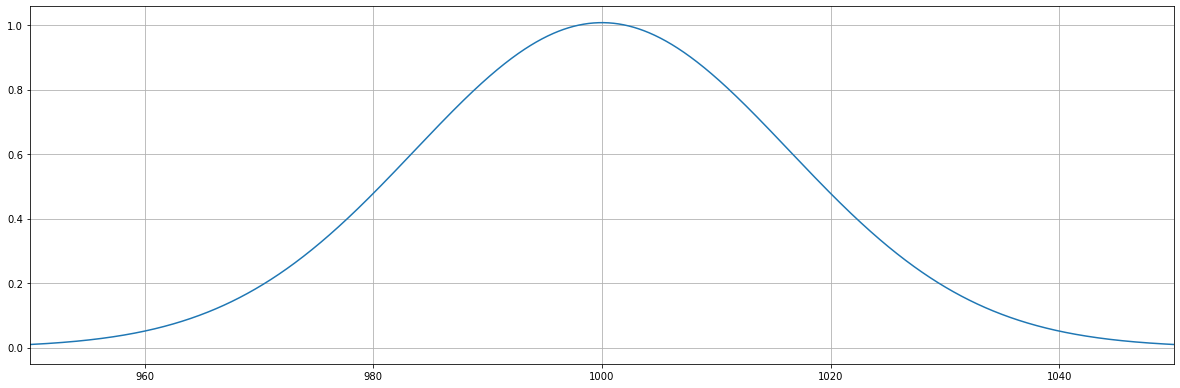

Half maxima at omega= 980.7443560863737 and omega= 1019.2603590513905 so domega=38.51600296501681


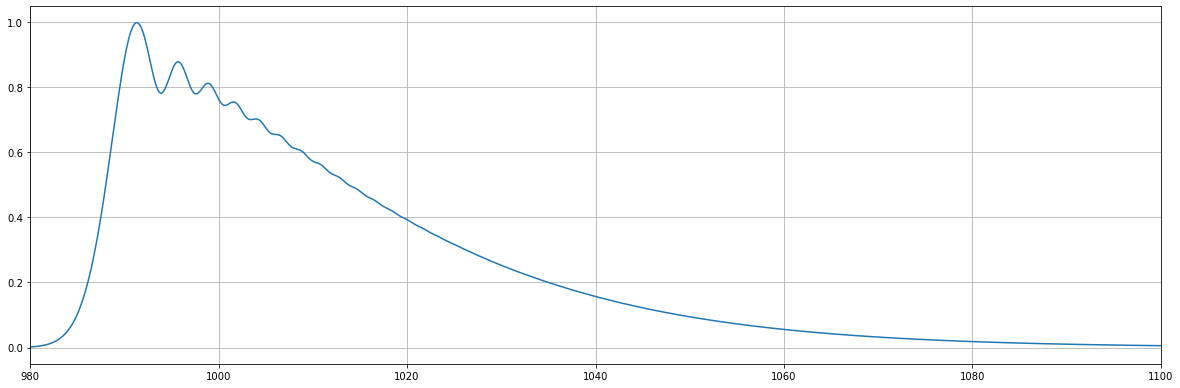

Half maxima at omega= 988.0328656197212 and omega= 988.0956975984569 so domega=0.06283197873574409


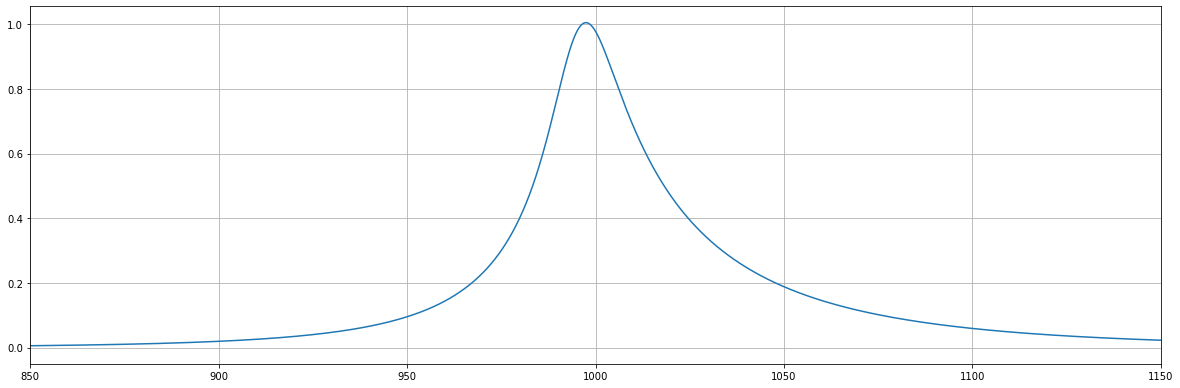

Half maxima at omega= 983.4461311720111 and omega= 1017.9408874979397 so domega=34.49475632592862


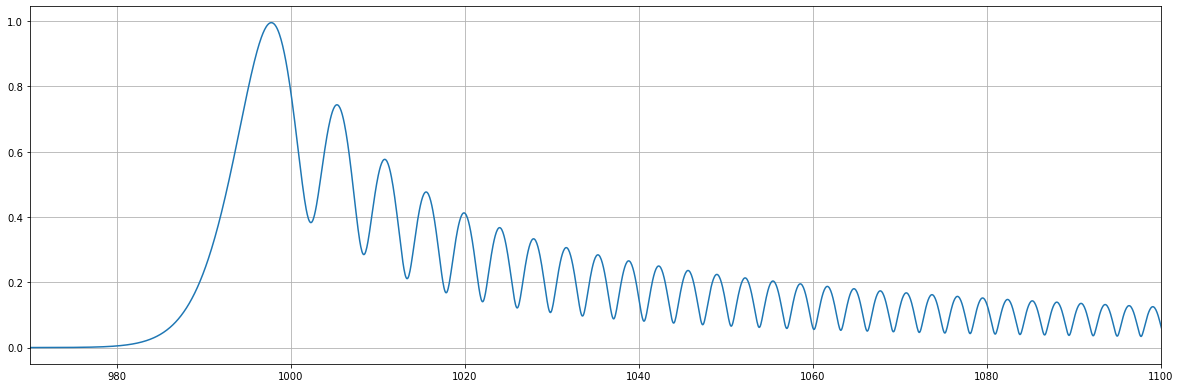

Half maxima at omega= 992.7452640249026 and omega= 1001.290413132965 so domega=8.545149108062446


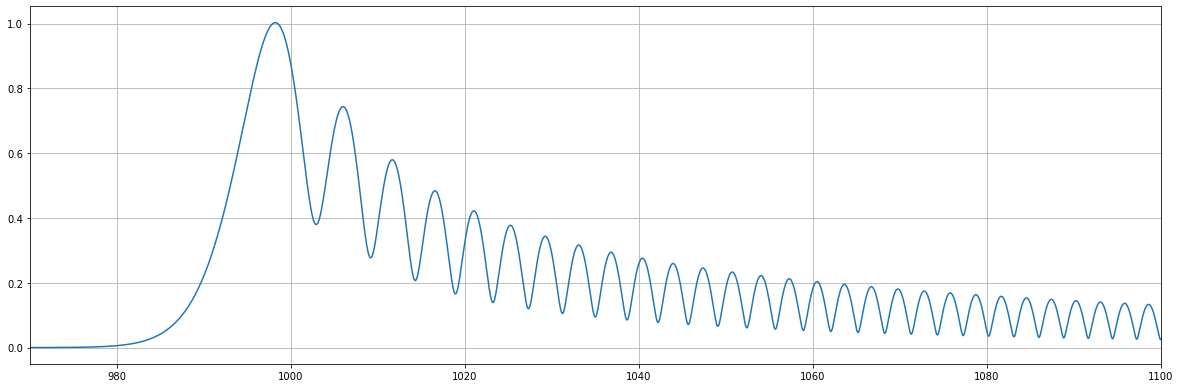

Half maxima at omega= 993.0594239185814 and omega= 1001.8559009415869 so domega=8.796477023005536


In [12]:
Spectral(pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10),a=360,tol=0.003)
Spectral(pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3),a=275,start=980,end=1100)
Spectral(pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3,-3),a=350,start=850,end=1150,tol=0.003)
Spectral(pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3,-3,10),a=240,start=970,end=1100,tol=0.005)
Spectral(pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3,-3,10,3),a=245,start=970,end=1100,tol=0.005)

After the second order the profile seems to get distorted more and more as the order is increased and only the second and fourth order profiles still resemble a Gaussian. Going back to the superposition of all these signals we get:

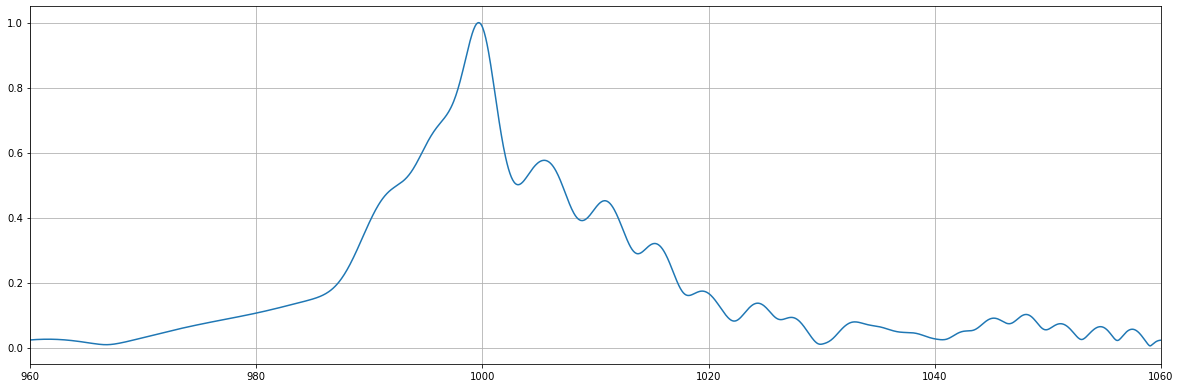

Half maxima at omega= 992.4939361099597 and omega= 1003.1125405163019 so domega=10.618604406342229


In [13]:
Total=pulse3(np.linspace(-50,50,10**6),1,10**3,0.75)[1]+pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10)[1]+pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3)[1]+pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3,-3)[1]+pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3,-3,10)[1]+pulse3(np.linspace(-50,50,10**6),1,10**3,0.75,-10,3,-3,10,3)[1]
Spectral((pulse3(np.linspace(-50,50,10**6),1,10**3,0.75)[0],Total),a=43,start=960,end=1060,tol=0.0015)

At this point $\Delta\omega$ make no more sense anymore as the spectral profile produced isn't a Gaussian anymore. Going back to the autocorrelation function we want to superpose a signal with itself with a delay $\tau$. Let us first try this with a first order phase and fixed $\tau$:

No delay:


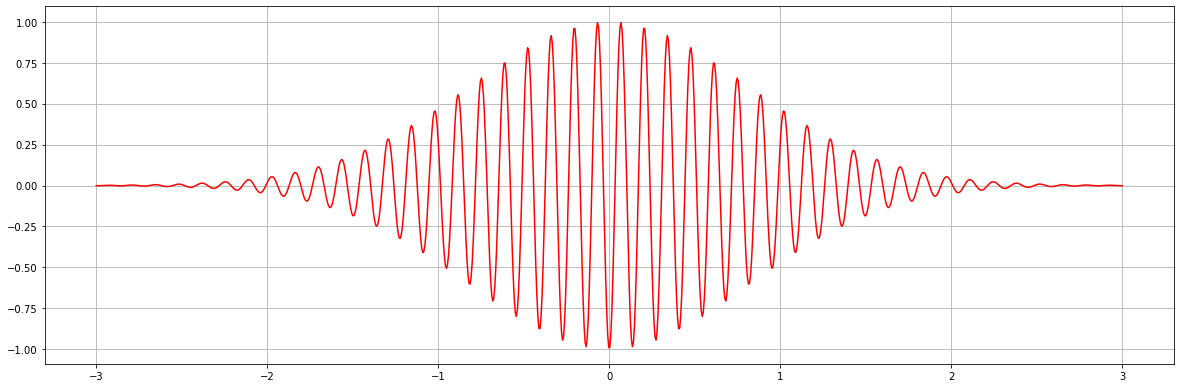

Half maxima at t= -0.9519519519519521 and t= 0.9519519519519517 so dt=1.9039039039039038
With delay:


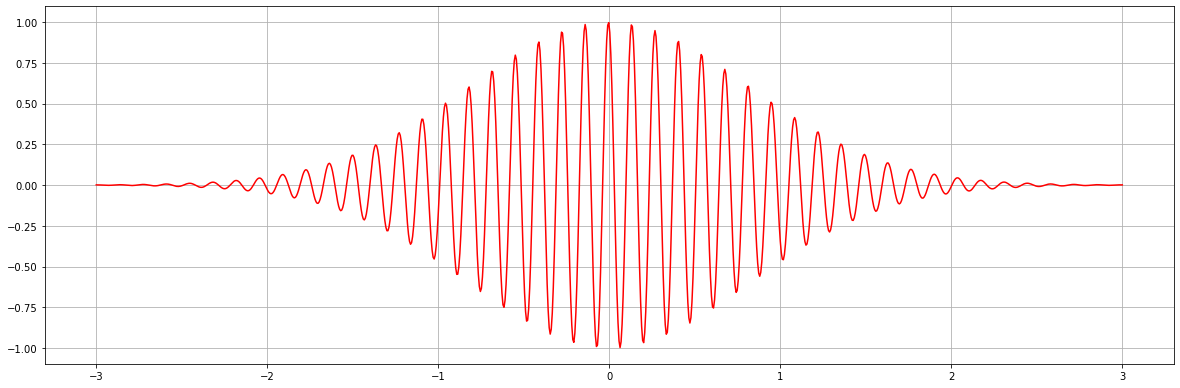

Half maxima at t= -0.9579579579579578 and t= 0.9519519519519517 so dt=1.9099099099099095
Superposition:


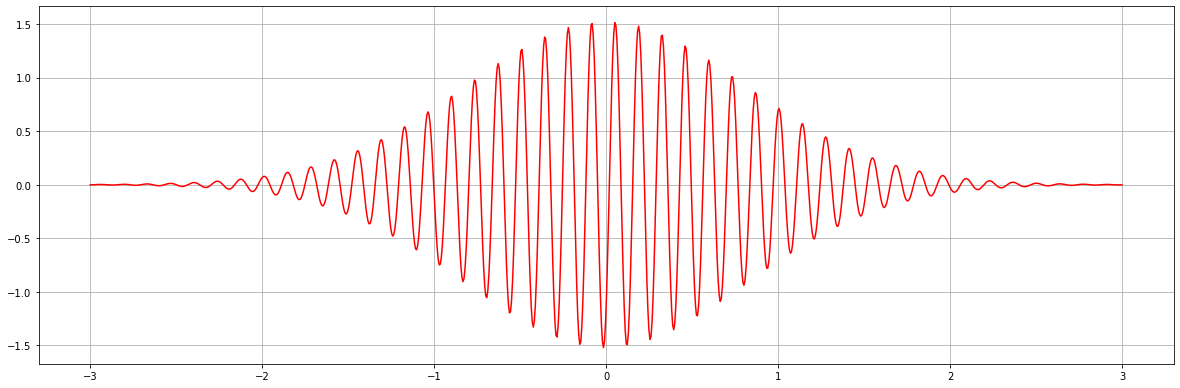

Half maxima at t= -0.8918918918918921 and t= 0.93993993993994 so dt=1.831831831831832


In [14]:
def pulse4(t1,e0,omega,g,tau=0):
    return (t1,e0*np.e**(-g*(t1**2))*np.cos(omega*(t1+tau)))

Total2=pulse4(np.linspace(-3,3,1000),1,10**3,0.75)[1]+pulse4(np.linspace(-3,3,1000),1,10**3,0.75,5)[1]
print("No delay:")
Temporal(pulse4(np.linspace(-3,3,1000),1,10**3,0.75))
print("With delay:")
Temporal(pulse4(np.linspace(-3,3,1000),1,10**3,0.75,+3))
print("Superposition:")
Temporal((np.linspace(-3,3,1000),Total2))

Moving on to the nonlinear case, we recall that the frequency-doubled light of the autocorrelation after the nonlinear process is given by: $$E(t,\tau)=E(t)E(t-\tau)$$ Let us now plot this beam for the same delay:

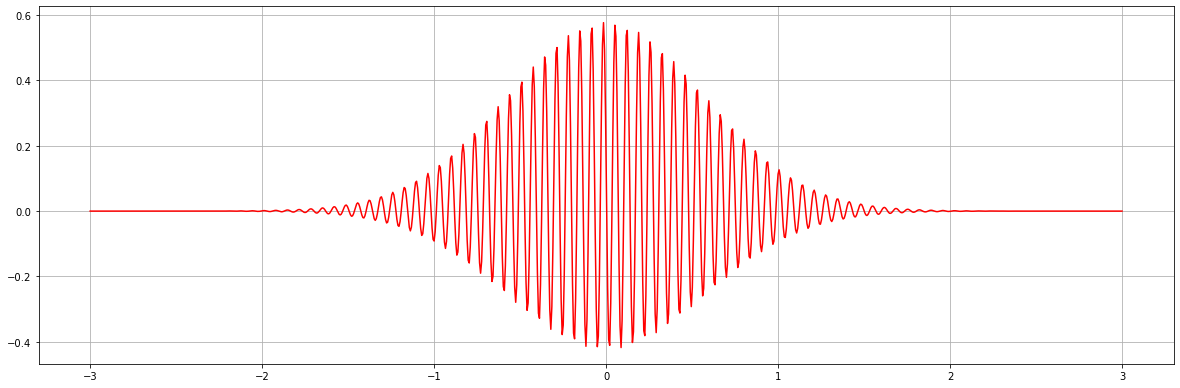

Half maxima at t= -0.4834834834834836 and t= 0.6636636636636637 so dt=1.1471471471471473


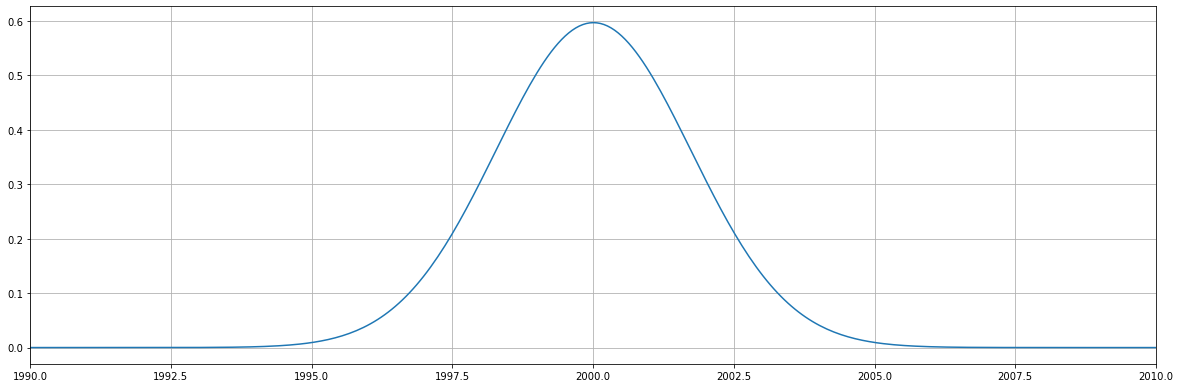

Half maxima at omega= 1997.9940918182203 and omega= 2002.0153384573084 so domega=4.021246639088076


In [15]:
Total3=pulse4(np.linspace(-3,3,1000),1,10**3,0.75)[1]*pulse4(np.linspace(-3,3,1000),1,10**3,0.75,5)[1]
Total3_spec=pulse4(np.linspace(-50,50,10**6),1,10**3,0.75)[1]*pulse4(np.linspace(-50,50,10**6),1,10**3,0.75,5)[1]

Temporal((np.linspace(-3,3,1000),Total3))
Spectral((np.linspace(-50,50,10**6),Total3_spec),start=1990,end=2010,a=165,tol=0.01)

As expected the peak is at double the original frequency. Now we can look at how the profile changes for different delays.

Text(0.5, 0, 'Amplitude')

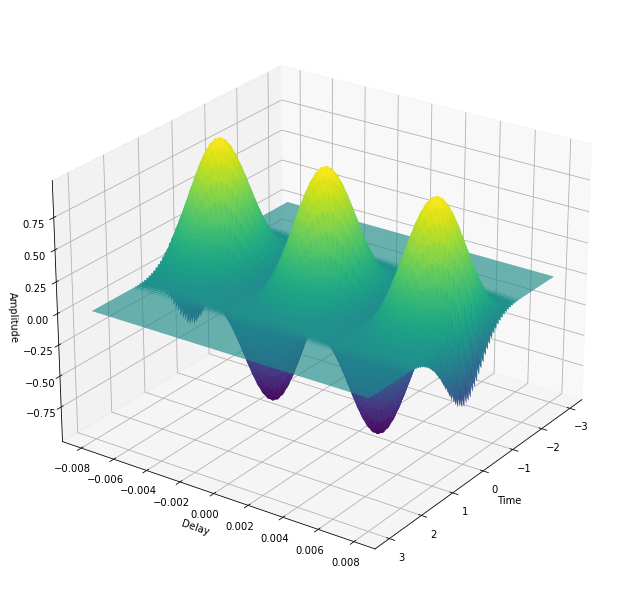

In [16]:
def f(x,y):
    return np.e**(-0.75*(x**2))*np.cos(10**3*x)*np.e**(-0.75*(x**2))*np.cos(10**3*(x+y))

x = np.linspace(-3, 3, 1000)
y = np.linspace(-8*10**-3,8*10**-3,200)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)

plt.rcParams["figure.figsize"] = [10.50, 8.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(25, 35)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('Time')
ax.set_ylabel('Delay')
ax.set_zlabel('Amplitude')


As can be seen from the graph, the peak changes with the delay periodically having a minimum at $\pm\pi\times 10^{-3}$ and a max at $0$ and $\pm 2\pi\times 10^{-3}$. The temporal profiles at these delays is given by:

Delay=0


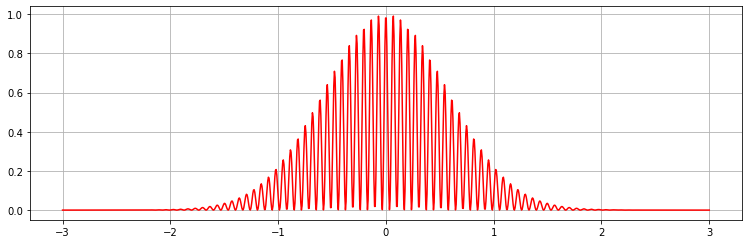

Half maxima at t= -0.6816816816816815 and t= 0.6816816816816815 so dt=1.363363363363363
Delay=-3


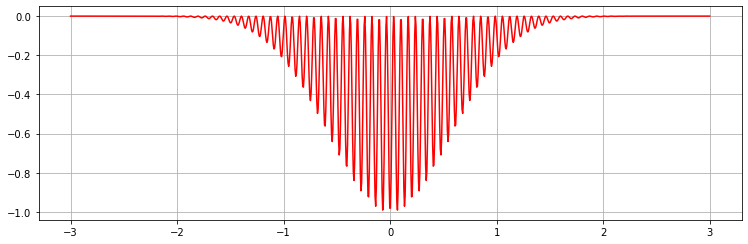

Half maxima at t= -0.6816816816816815 and t= 0.6816816816816815 so dt=1.363363363363363


In [17]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]

Mx=pulse4(np.linspace(-3,3,1000),1,10**3,0.75)[1]*pulse4(np.linspace(-3,3,1000),1,10**3,0.75,0)[1]
Mi=pulse4(np.linspace(-3,3,1000),1,10**3,0.75)[1]*pulse4(np.linspace(-3,3,1000),1,10**3,0.75,-np.pi*10**-3)[1]

print("Delay=0")
Temporal((np.linspace(-3,3,1000),Mx))
print("Delay=-3")
Temporal((np.linspace(-3,3,1000),Mi))

As can be seen they are mirror images of each other. Their spectral profiles are the same as the one given at a delay of 5. This is to be expected as the frequency, which is the derivative of the phase with respect to time remains unchanged when a constant is added to it. Let us now move on to the propogation of such pulses in transparent media. We recall that the spectrum of a pulse after it has travelled a distance x in the medium is given by: $$E(\omega,x)=E_0(\omega)\times e^{ix\frac{n\omega}{c}}$$ Where $E_0(\omega)$ is the initial spectrum of the pulse. We can take the inverse Fourier transform of the resultant spectrum to determine the temporal profile of the resultant pulse.

The spectral (top) and temporal (bottom) profiles of a pulse with a first order phase and constant refractive index


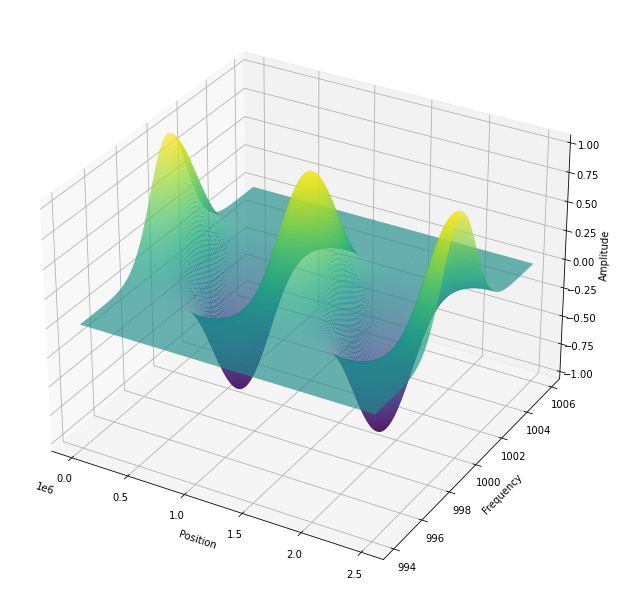

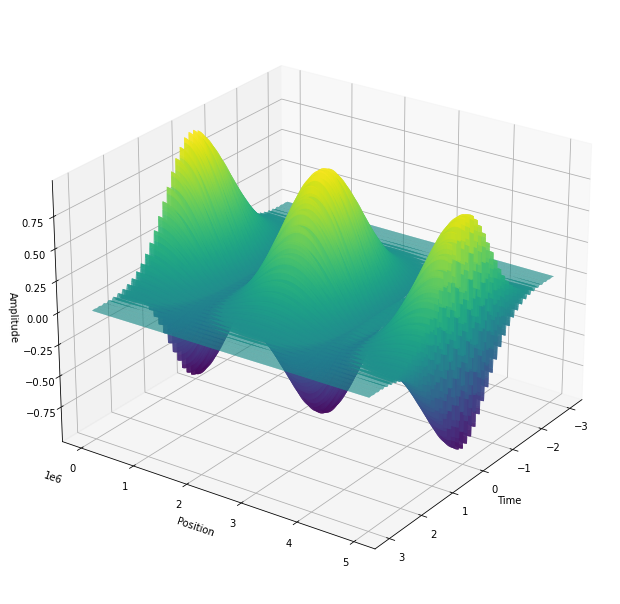

In [86]:
def Fourier(p,a=100):
    
    t1,pul=p
    N=len(t1)
    T=t1[-1]/N*2
    
    y_f = np.fft.fft(pul)
    x_f = 2*np.pi*np.linspace(0, 1/(2*T), N//2)
    y=a/N*np.abs(y_f[:N//2])
    
    temp=list()
    
    x_f,y=x_f[100:],y[100:]
    
    for i in range(len(x_f)):
        if y[i]>10**-5:
            temp.append(i)

    return(x_f[temp[0]:temp[-1]],y[temp[0]:temp[-1]])

def prop_spec(p,dur,n):
    
    omega,pul=p
    x=np.linspace(0,dur,1000)
    X,Y=np.meshgrid(x, omega)
    Z = np.zeros((len(omega),len(x)))
          
    for i in range(len(omega)):
        for j in range(len(x)):
            Z[i][j] = pul[i]*np.cos(x[j]*n*omega[i]/(3*10**8))

    plt.rcParams["figure.figsize"] = [10.50, 8.50]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Amplitude')
    

def prop_temp(p,dur,n):
    
    c=3*10**8
    t1,pul=p
    N=len(t1)
    T=t1[-1]/N*2
    
    y_f = np.fft.fft(pul).real
    omega= 2*np.pi*np.linspace(0, 1/(2*T), N)
    pul=100/N*np.abs(y_f[:N//2])
    
    x=np.linspace(0,dur,400)
    Z = np.zeros((len(x),len(omega)))
          
    for i in range(len(x)):
        for j in range(len(omega)):
            Z[i][j] = y_f[j]*np.cos(x[i]*n*omega[j]/c)
            
    for i in range(len(x)):
        Z[i]=np.fft.ifft(Z[i]).real
    
    X,Y=np.meshgrid(t1,x)
    
    plt.rcParams["figure.figsize"] = [10.50, 8.50]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(25, 35)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_xlabel('Time')
    ax.set_ylabel('Position')
    ax.set_zlabel('Amplitude')
    plt.show()
    
    plt.rcParams["figure.figsize"] = [10.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

print("The spectral (top) and temporal (bottom) profiles of a pulse with a first order phase and constant refractive index")

prop_spec(Fourier(pulse4(np.linspace(-50,50,10**6),1,10**3,0.75)),2.5*10**6,1.52)

prop_temp(pulse4(np.linspace(-3,3,10**3),1,10**3,0.75),5*10**6,1.52)

we know from before that the signal should also experience a delay as it propagates in the medium; in fact, this delay should be given by $\frac{nx}{c}$ when the refractive index is constant as this value is really small for the x values of our interest and to simplify calculations it has not been implimented. Once again as the spectral profile is periodic, the temporal one is as well.Now we have obtained function to model the propagation of a light pulse in a transparent medium. As the input is taken as the temporal profile of the pulse, any pulse's spatial evolution can be modeled using these functions. Now we can go back to the signal leaving the doubling crystal and explore its propagation.

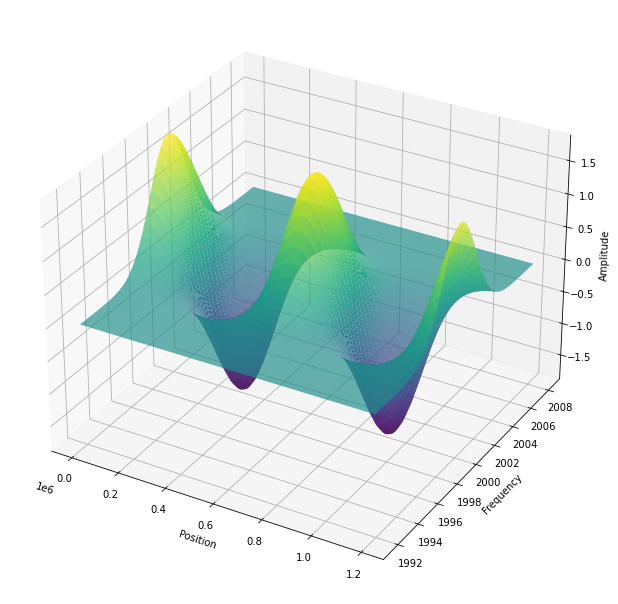

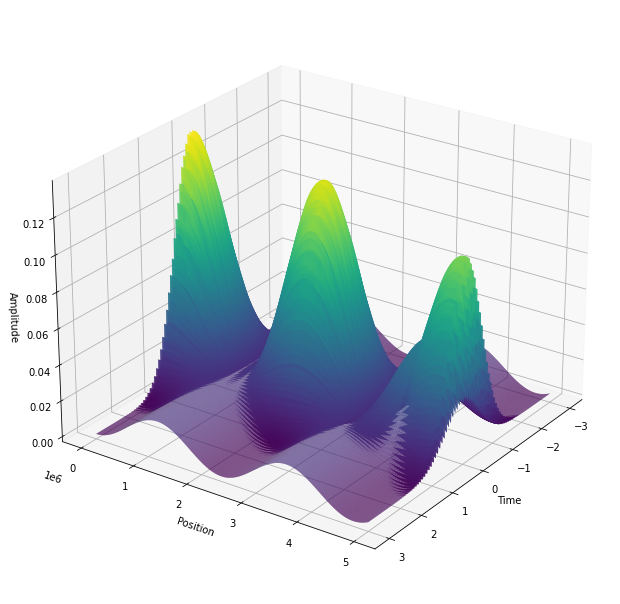

In [100]:
Total3=pulse4(np.linspace(-3,3,1000),1,10**3,0.75)[1]*pulse4(np.linspace(-3,3,1000),1,10**3,0.75,5)[1]
Total3_spec=pulse4(np.linspace(-10,10,10**6),1,10**3,0.75)[1]*pulse4(np.linspace(-10,10,10**6),1,10**3,0.75,5)[1]

prop_spec(Fourier((np.linspace(-10,10,10**6),Total3_spec)),1.2*10**6,1.52)

prop_temp((np.linspace(-3,3,10**3),Total3),5*10**6,1.52)

We can now simulate the propagation of the two beams entering and leaving the crystal as well as the propagation of the second-harmonic produced leaving the crystal. Due to limitations with the computation the refractive index has been kept constant but given as a function of the frequency or the intensity of the beam it can easily be implemented by replacing it with the said relation in the function.